# pypdb advanced demos

This is a set of basic examples of the ways that algorithmic querying with PyPDB can be used to perform advanced search tasks. Most of these examples combine multiple functions in the API

### Preamble

In [1]:
%pylab inline
from IPython.display import HTML

from pypdb.pypdb import *

import pprint

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named 'pypdb.pypdb'; 'pypdb' is not a package

### Estimate total number of depositions versus time

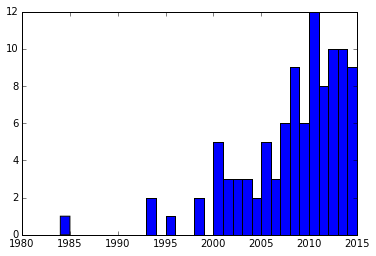

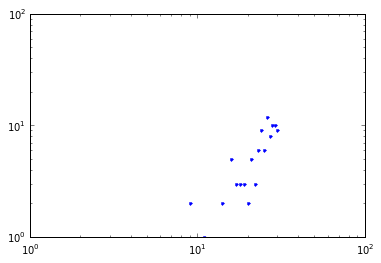

In [4]:
# Choose a random sample because we don't want to call the database for every single entry
from random import choice

all_pdbs = get_all()

all_dates = list()

for ii in range(100):
    pdb_desc = describe_pdb( choice(all_pdbs) )
    depdate = (pdb_desc['deposition_date'])
    all_dates.append( int(depdate[:4]) )
    
all_dates = array(all_dates)

figure()
subs_v_time = hist(all_dates, max(all_dates)-min(all_dates))
show(subs_v_time)   

# Show power-law scaling
figure()
subs_v_time_loglog = loglog(subs_v_time[0],'.')
show(subs_v_time_loglog)

### Graph new CRISPR entries versus time

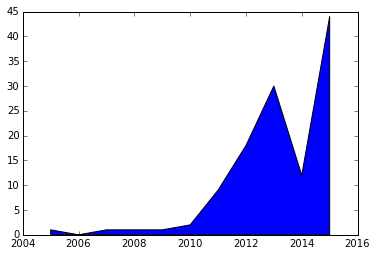

In [42]:
# Perform search
all_dates = find_dates('crispr', max_results=500)
all_dates = array(all_dates)
all_dates = array([int(depdate[:4]) for depdate in all_dates])
subs_v_time = histogram(all_dates, max(all_dates)-min(all_dates))
dates, num_entries = subs_v_time[1][1:], subs_v_time[0]
popgraph = fill_between(dates, 0, num_entries)

# Formatting the plots
xlim([dates[0], dates[-1]] )
gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))
xticks(fontweight='bold')
yticks(fontweight='bold')
xlabel('Year',fontweight='bold')
ylabel('New PDB entries',fontweight='bold')
show(popgraph)

### Sweep RMSD matching parameters

In [ ]:
def ids_versus_symmetry_rmsd(sym_group, cutoff=20.0):
    '''Return a list of PDBs as a function of their RMSD distance from the user-specified symmetry group
    
    '''

### Look up information about the results of a BLAST search